# 1. Bayes Classifier
Bayes Rule:

$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$

- For each class $y$, we model $p(x|y)$, rather than directly modeling $p(y|x)$.
- Learn $p(x|y) = N(\mu_{y}, \Sigma_{y})$ where $\mu_y$ is the mean of those $x$'s belongs to class $y$, $\Sigma_y$ is the covariance of those $x$'s.
# 1-1. Single Gaussian Model
Sampling from the Bayes classifier:
- Sample from a given $k$ class directly. We know $p(x|y = k)$ is a Gaussian, so that we can sample from this Gaussian. 
- Sample from $p(y)p(x|y) = p(x,y)$. Sample from $p(y)$ first. Now we have $y$, so that sample from $p(x|y)$.

1. `scipy.stats.multivariate_normal.rvs(mean=None, cov=1, size=1, random_state=None)`: Draws random samples from a multivariate normal distribution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [2]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):
        # Assume classes are numbered 0, ..., k - 1
        self.K = len(set(Y))
        self.gaussians = []
        self.p_y = np.zeros(self.K)

        # Loop through each class
        for k in range(self.K):
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            # Get the mean value (array with ndim = 1) of the y-axis (all data in the `k` class)
            mean = Xk.mean(axis=0)
            # Covariance matrix (array with )
            cov = np.cov(Xk.T)
            
            # print(cov.shape)
            # (784, 784)
            # print(cov.ndim)
            # 2
            
            # Gaussians
            g = {'m': mean, 'c': cov}
            self.gaussians.append(g)
        # Normalize p(y)
        self.p_y /= self.p_y.sum()

    # Draw random samples from a multivariate normal distribution using `mvn.rvs()`
    def sample_given_y(self, y):
        g = self.gaussians[y]
        return clamp_sample(mvn.rvs(mean=g['m'], cov=g['c']))

    # Random sampling
    def sample(self):
        # print(self.K)
        # 10
        # print(self.p_y)
        # [0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714 0.0985     0.10478571 0.0967381  0.09971429]

        # `random.choice()` generates a uniform random sample of size `K` & the probabilities associated with each entry are `p_y`
        y = np.random.choice(self.K, p=self.p_y)
        # print(y)
        # 6
        
        return clamp_sample(self.sample_given_y(y))

In [3]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("datasets/digit-recognizer/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = df.values
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [5]:
X = data[:, 1:] / 255.0
Y = data[:, 0]
X, Y = shuffle(X, Y)

In [6]:
clf = BayesClassifier()
clf.fit(X, Y)

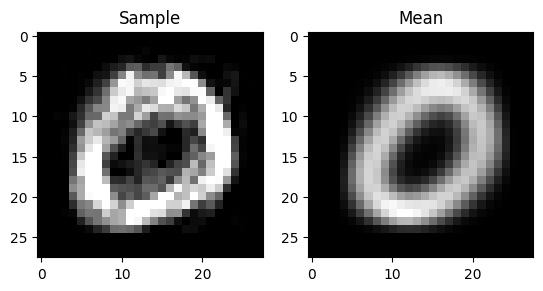

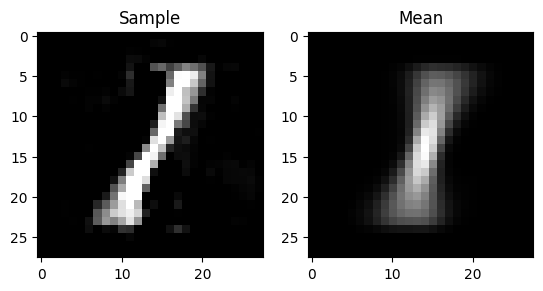

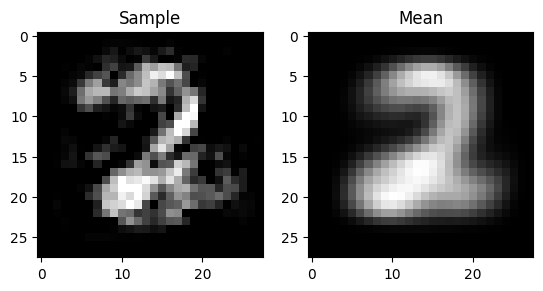

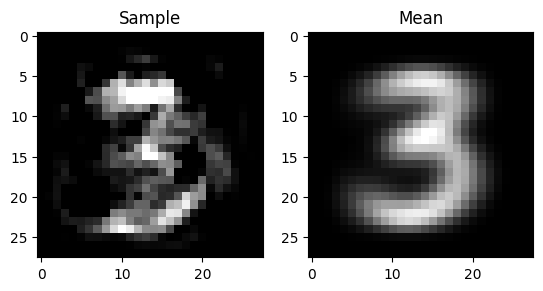

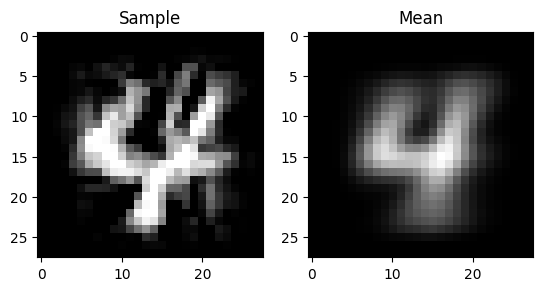

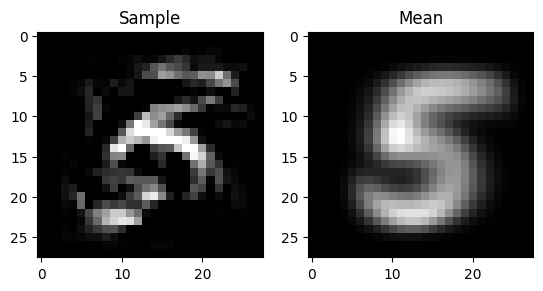

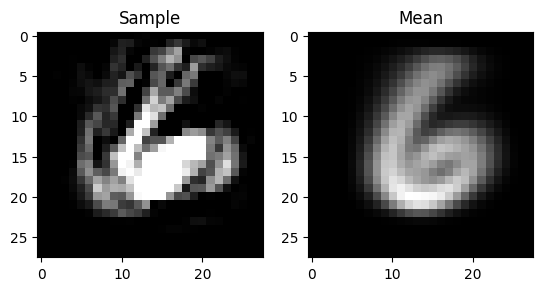

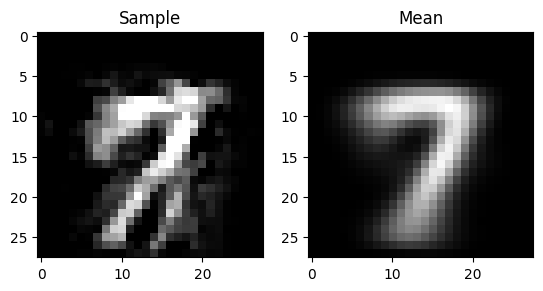

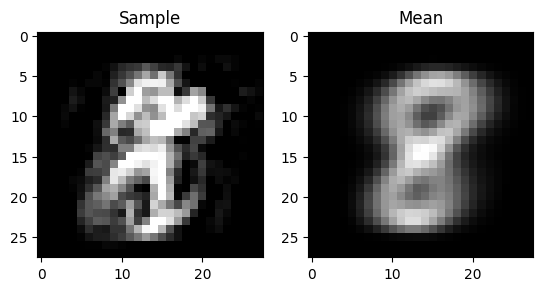

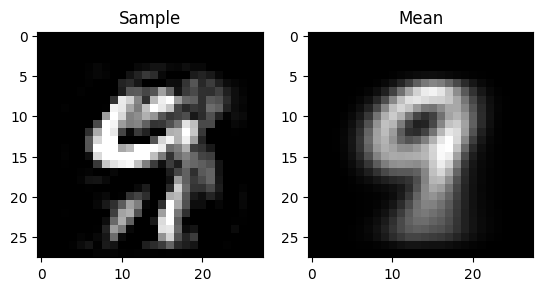

In [7]:
for k in range(clf.K):
    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

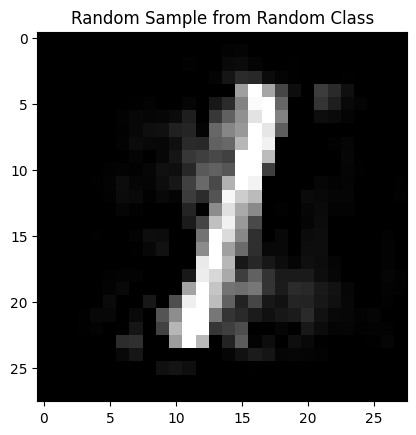

In [8]:
# Generate a random sample
sample = clf.sample().reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.show()

# 1-2. Gaussian Mixture Model
With **Gaussian Mixture Model (GMM)** for $p(x|y)$:
- We first sample from $p(y)$, class frequencies, for $y$.
- From $p(z|y)$, different writing styles, for $z$.
- Then $p(x|z,y)$.

1. `sklearn.mixture.BayesianGaussianMixture(*, n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)`: Variational Bayesian estimation of a Gaussian mixture.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [10]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):
        # Assume classes are numbered 0, ..., k - 1
        self.K = len(set(Y))
        self.gaussians = []
        self.p_y = np.zeros(self.K)

        # Loop through each class
        for k in range(self.K):
            print("Fitting GMM", k)
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            # `BayesianGaussianMixture()`
            gmm = BayesianGaussianMixture(n_components=10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)      
        # Normalize p(y)
        self.p_y /= self.p_y.sum()

    def sample_given_y(self, y):
        gmm = self.gaussians[y]

        # Return the sample & which cluster it came from
        sample = gmm.sample()
        # print(sample[0].shape)
        # (1, 784)
        # print(sample[0].ndim)
        # 2
        
        mean = gmm.means_[sample[1]]
        # print(mean.shape)
        # (1, 784)
        # print(mean.ndim)
        # 2
        
        return clamp_sample(sample[0].reshape(28, 28)), mean.reshape(28, 28)

    def sample(self):
        y = np.random.choice(self.K, p=self.p_y)
        return clamp_sample(self.sample_given_y(y))

In [11]:
clf = BayesClassifier()
clf.fit(X, Y)

Fitting GMM 0
Fitting GMM 1
Fitting GMM 2
Fitting GMM 3
Fitting GMM 4
Fitting GMM 5
Fitting GMM 6
Fitting GMM 7
Fitting GMM 8
Fitting GMM 9


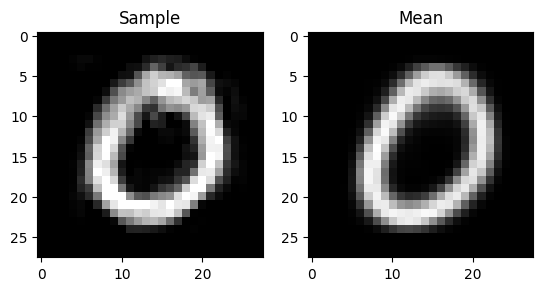

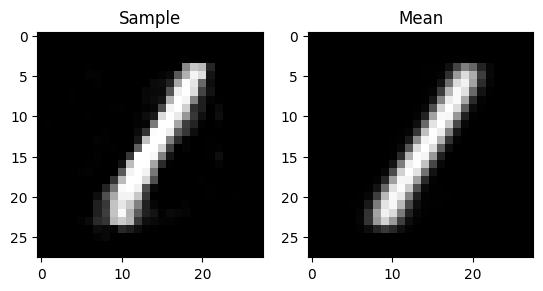

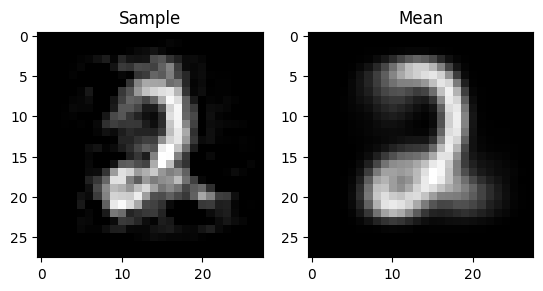

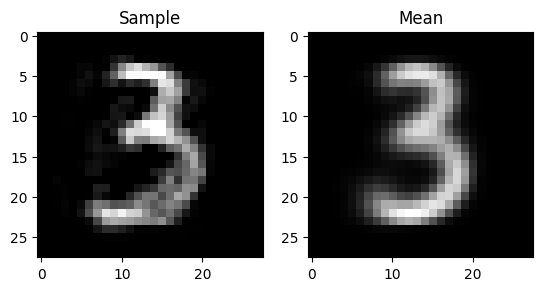

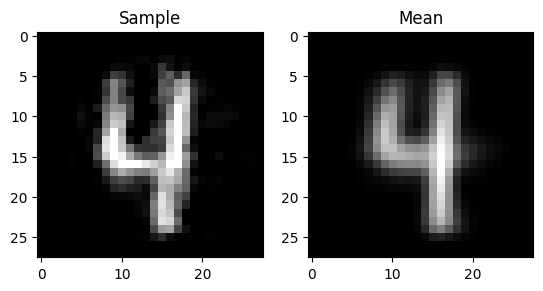

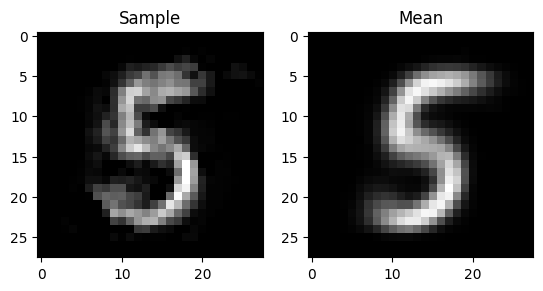

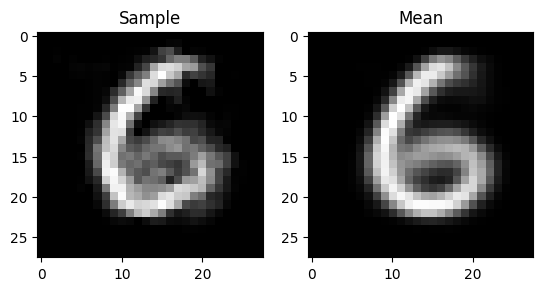

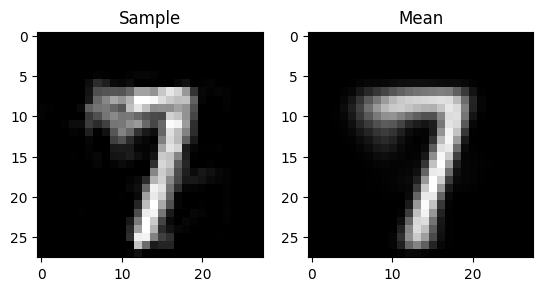

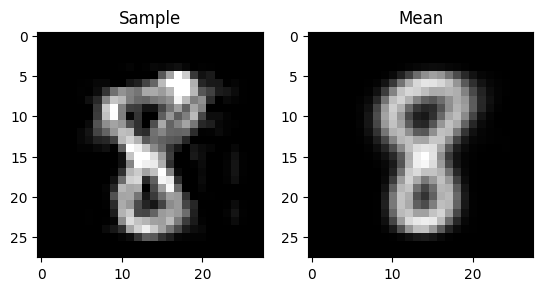

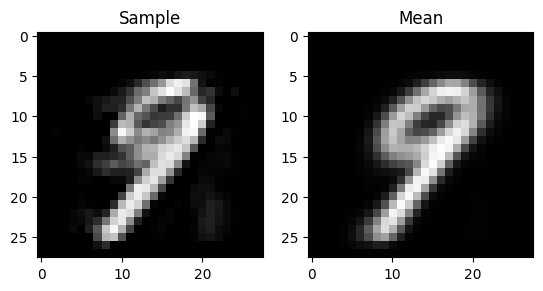

In [12]:
for k in range(clf.K):
    # Show one sample for each class also show the mean image learned
    sample, mean = clf.sample_given_y(k)

    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1, 2, 2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

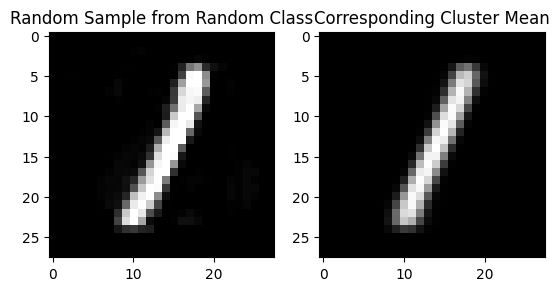

In [13]:
# Generate a random sample
sample, mean = clf.sample()
plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.subplot(1,2,2)
plt.imshow(mean, cmap='gray')
plt.title("Corresponding Cluster Mean")
plt.show()

# 2. Autoencoder
Traditional autoencoder with one hidden unit:

$z=f(W_{1}^{T}x + b_{1})$

$\hat{x}=g(W_{2}^{T}z + b_{2})$

# 3. Variational Autoencoder (VAE)

The architecture of variational autoencoders:
- The encoder outputs a mean & variance, $q(z|x)$, which represents a Gaussian trying to approximate $p(z|x)$.
- In the latent space, sample from $q(z|x)$ to get $z$.
- The decoder also outputs a distribution, $p(\hat{x}|z)$. With binary classification, we just round to get a prediction, $\hat{y}=p(y=k|x)$; with variational autoencoders, we can generate samples from a probability distribution. 

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid

In [2]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose([transforms.ToTensor()])

# download the MNIST datasets
path = '~/datasets'
train_dataset = MNIST(path, transform=transform, download=True)
test_dataset  = MNIST(path, transform=transform, download=True)

# create train and test dataloaders
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:08<00:00, 1182918.16it/s]


Extracting /home/yungshun317/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /home/yungshun317/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 28881/28881 [00:00<00:00, 97159.23it/s]


Extracting /home/yungshun317/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /home/yungshun317/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:04<00:00, 345392.58it/s]


Extracting /home/yungshun317/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/yungshun317/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 7103105.43it/s]

Extracting /home/yungshun317/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/yungshun317/datasets/MNIST/raw



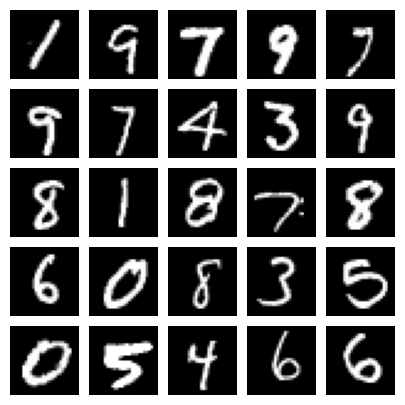

In [4]:
# get 25 sample training images for visualization
dataiter = iter(train_loader)
image = dataiter.__next__()

num_samples = 25
sample_images = [image[0][i,0] for i in range(num_samples)] 

fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0.1)

for ax, im in zip(grid, sample_images):
    ax.imshow(im, cmap='gray')
    ax.axis('off')

plt.show()

In [11]:
class VAE(nn.Module):

    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=200, device=device):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, latent_dim),
            nn.LeakyReLU(0.2)
        )
        
        # Latent mean and variance 
        self.mean_layer = nn.Linear(latent_dim, 2)
        self.logvar_layer = nn.Linear(latent_dim, 2)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, latent_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
     
    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(device)      
        z = mean + var*epsilon
        return z

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        mean, log_var = self.encode(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) 
        x_hat = self.decode(z)  
        return x_hat, mean, log_var

In [12]:
from torch.optim import Adam

model = VAE().to(device)
optimizer = Adam(model.parameters(), lr=1e-3)

In [13]:
def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

In [14]:
def train(model, optimizer, epochs, device, x_dim=784):
    model.train()
    for epoch in range(epochs):
        overall_loss = 0
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.view(batch_size, x_dim).to(device)

            optimizer.zero_grad()

            x_hat, mean, log_var = model(x)
            loss = loss_function(x, x_hat, mean, log_var)
            
            overall_loss += loss.item()
            
            loss.backward()
            optimizer.step()

        print("\tEpoch", epoch + 1, "\tAverage Loss: ", overall_loss/(batch_idx*batch_size))
    return overall_loss

train(model, optimizer, epochs=50, device=device)

	Epoch 1 	Average Loss:  180.29139977762418
	Epoch 2 	Average Loss:  161.68061441921432
	Epoch 3 	Average Loss:  157.30993206450856
	Epoch 4 	Average Loss:  154.9702342771807
	Epoch 5 	Average Loss:  153.3926286486592
	Epoch 6 	Average Loss:  152.09681298257513
	Epoch 7 	Average Loss:  150.97844734714107
	Epoch 8 	Average Loss:  150.17668047005427
	Epoch 9 	Average Loss:  149.3759014046849
	Epoch 10 	Average Loss:  148.68183306813438
	Epoch 11 	Average Loss:  148.02659645959412
	Epoch 12 	Average Loss:  147.68724557204717
	Epoch 13 	Average Loss:  147.16909099801754
	Epoch 14 	Average Loss:  146.77011355188336
	Epoch 15 	Average Loss:  146.40114334437604
	Epoch 16 	Average Loss:  146.13363843710871
	Epoch 17 	Average Loss:  145.81343057113418
	Epoch 18 	Average Loss:  145.37698410110602
	Epoch 19 	Average Loss:  145.3343038853819
	Epoch 20 	Average Loss:  144.94185393624792
	Epoch 21 	Average Loss:  144.7401118074395
	Epoch 22 	Average Loss:  144.43963679700542
	Epoch 23 	Average Loss:

8426467.008789062

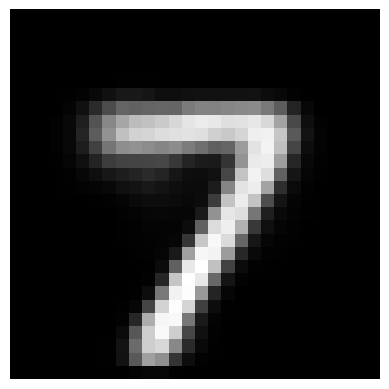

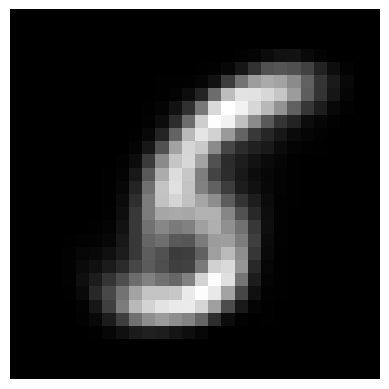

(None, None)

In [15]:
def generate_digit(mean, var):
    z_sample = torch.tensor([[mean, var]], dtype=torch.float).to(device)
    x_decoded = model.decode(z_sample)
    digit = x_decoded.detach().cpu().reshape(28, 28) # reshape vector to 2d array
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

generate_digit(0.0, 1.0), generate_digit(1.0, 0.0)

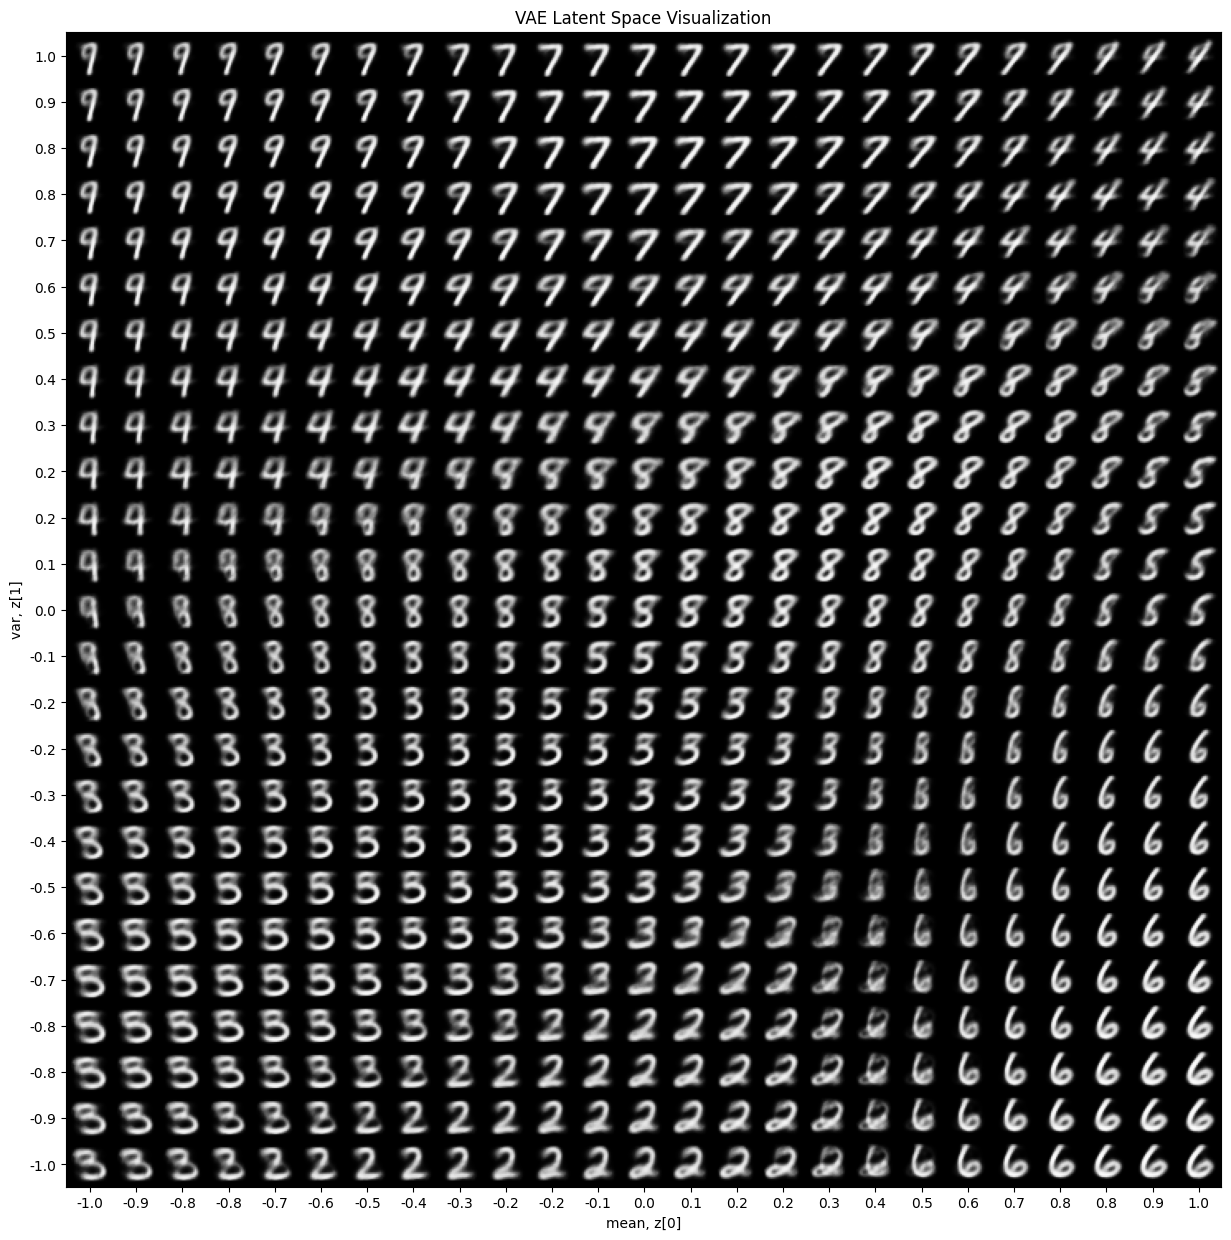

In [18]:
def plot_latent_space(model, scale=1.0, n=25, digit_size=28, figsize=15):
    # display a n*n 2D manifold of digits
    figure = np.zeros((digit_size * n, digit_size * n))

    # construct a grid 
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = torch.tensor([[xi, yi]], dtype=torch.float).to(device)
            x_decoded = model.decode(z_sample)
            digit = x_decoded[0].detach().cpu().reshape(digit_size, digit_size)
            figure[i * digit_size : (i + 1) * digit_size, j * digit_size : (j + 1) * digit_size,] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.title('VAE Latent Space Visualization')
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("mean, z[0]")
    plt.ylabel("var, z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(model)

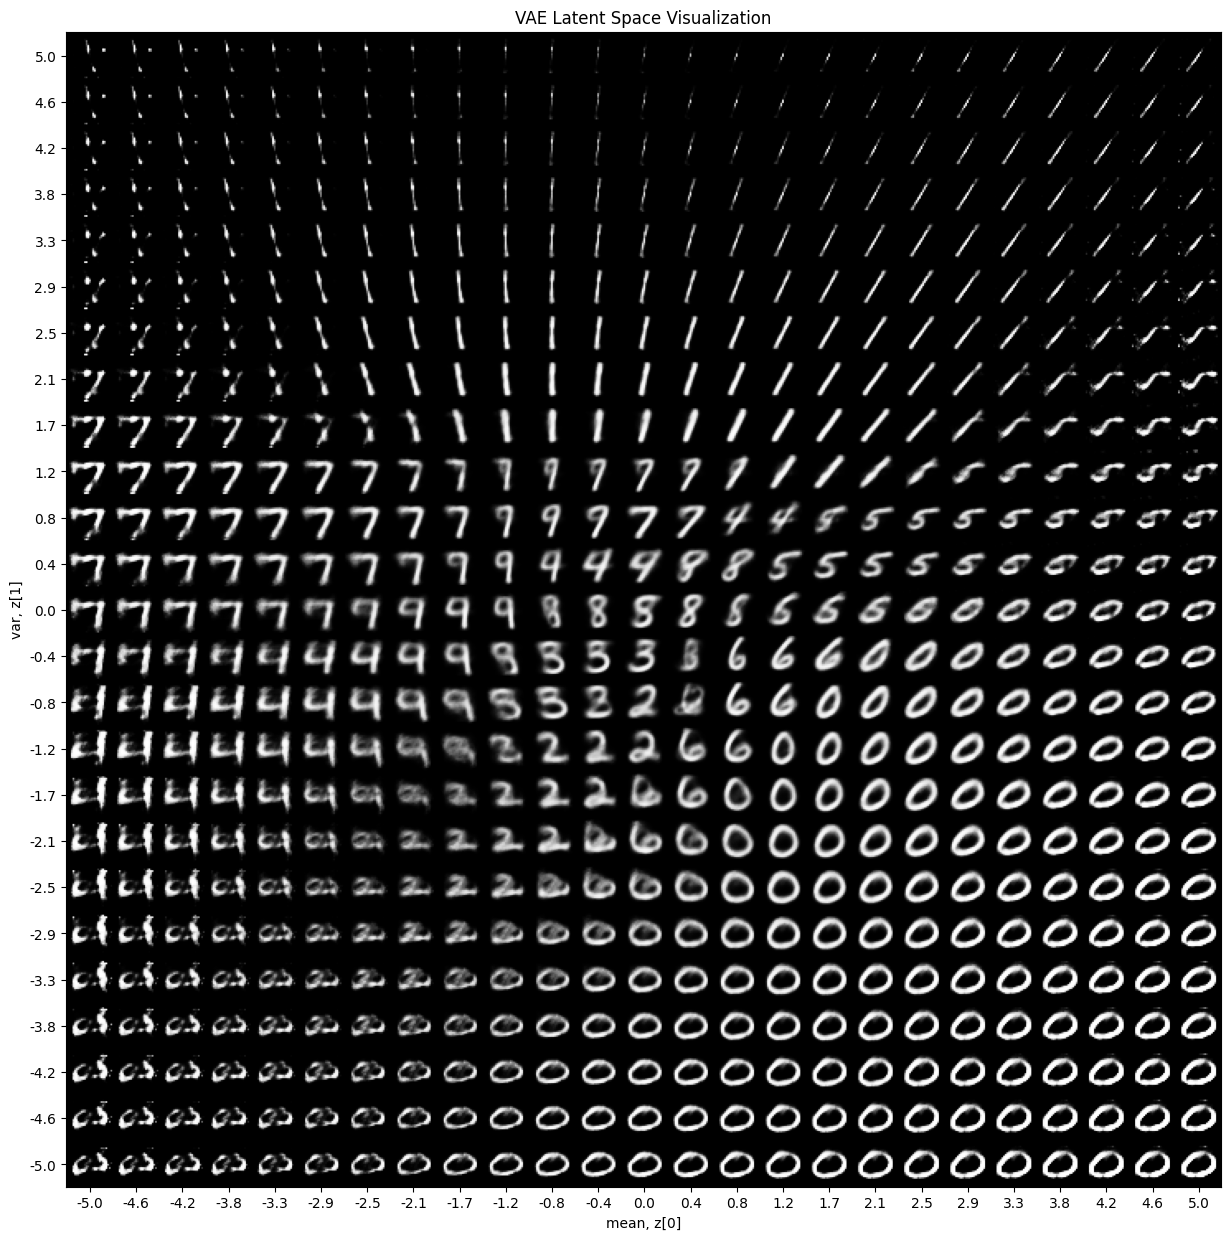

In [19]:
plot_latent_space(model, scale=5.0)

# 4. Generative Adversarial Network (GAN)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        def block(input_features, output_features, normalize=True):
            layers = [nn.Linear(input_features, output_features)]
            if normalize: # Default
                layers.append(nn.BatchNorm1d(output_features, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True)) # inplace=True : modify the input directly. It can slightly decrease the memory usage.
            return layers # return list of layers
        
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False), # Asterisk('*') in front of block means unpacking list of layers - leave only values(layers) in list
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))), # np.prod(1, 28, 28) == 1*28*28
            nn.Tanh() # result : from -1 to 1
        )

    def forward(self, z): # z == latent vector(random input vector)
        img = self.model(z) # (64, 100) --(model)--> (64, 784)
        img = img.view(img.size(0), *img_shape) # img.size(0) == N(Batch Size), (N, C, H, W) == default --> (64, 1, 28, 28)
        return img